In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

C:\Users\gouta\AppData\Local\Temp\ipykernel_10092\2529783991.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('upsampled_churn_data.csv')

In [3]:
df.Churn.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [4]:
X = df.drop('Churn', axis=1)
Y = df.Churn

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

forest = RandomForestClassifier()
gdb = GradientBoostingClassifier()
log_reg = LogisticRegression()

In [23]:
forest.fit(X_train,y_train)
gdb.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

LogisticRegression()

In [24]:
forest_preds = forest.predict(X_test)
gdb_preds = gdb.predict(X_test)
log_preds = log_reg.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, precision_score, precision_recall_curve

In [38]:
print('forest acc: ', accuracy_score(y_test, forest_preds)*100)
print('gdb acc: ', accuracy_score(y_test, gdb_preds)*100)
print('log_reg_acc: ', accuracy_score(y_test, gdb_preds)*100)

forest acc:  90.02904162633108
gdb acc:  78.41239109390126
log_reg_acc:  78.41239109390126


In [39]:
print('forest recall: ', recall_score(y_test, forest_preds)*100)
print('gdb recall: ', recall_score(y_test, gdb_preds)*100)
print('log reg recall: ', recall_score(y_test, log_preds)*100)

forest recall:  95.20958083832335
gdb recall:  82.73453093812375
log reg recall:  82.33532934131736


In [40]:
print('f1_score for random forest', f1_score(y_test, forest_preds))
print('f1_score for Gradient Booosting', f1_score(y_test, gdb_preds))
print('f1_score for logistic regression', f1_score(y_test, log_preds))

f1_score for random forest 0.902554399243141
f1_score for Gradient Booosting 0.7880228136882129
f1_score for logistic regression 0.7772020725388601


- we can see that the ***RandomForestClassifier*** model gives the best metrics so we will proceed with it.

# Hyperparameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100,150,200],
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [44]:
y_preds = grid_search.predict(X_test)

In [49]:
print('accuray for random forest after tuning: ',accuracy_score(y_test, y_preds)*100)
print('recall for random forest after tuning: ',recall_score(y_test, y_preds)*100)
print('precision for random forest after tuning: ',precision_score(y_test, y_preds)*100)
print('f1 score for random forest after tuning: ',f1_score(y_test, y_preds)*100)

accuray for random forest after tuning:  90.17424975798644
recall for random forest after tuning:  95.40918163672654
precision for random forest after tuning:  85.89398023360287
f1 score for random forest after tuning:  90.40189125295508


<Axes: >

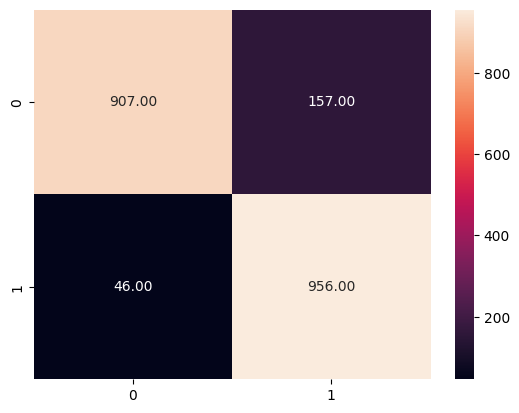

In [54]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, fmt='.2f')

# Exporting the model

In [56]:
model = grid_search

In [57]:
import pickle

with open ('churn_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
)